# 02 - GRAFICO DE BARRAS

* Comparativo entre dados categóricos
* Comparativos mensais e anuais
* Exemplo: Comparar o total de vendas por estado

In [1]:
# importando a biblioteca
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
dados = sns.load_dataset('penguins')

In [6]:
dados.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
dados.groupby('island')['species'].count()

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

In [8]:
dados['island'].value_counts(ascending=True)

Torgersen     52
Dream        124
Biscoe       168
Name: island, dtype: int64

In [10]:
dados.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:>

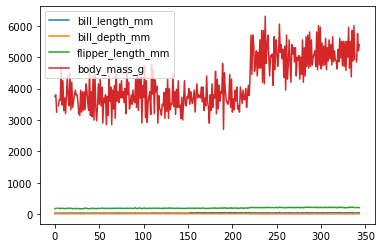

In [13]:
dados.plot()

In [14]:
dados['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<AxesSubplot:>

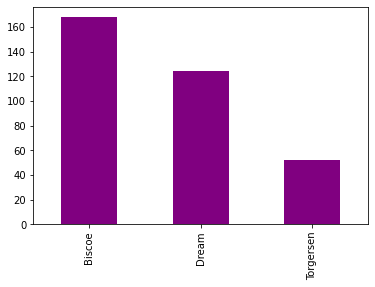

In [17]:
dados['island'].value_counts().plot.bar(color ='purple')

<AxesSubplot:>

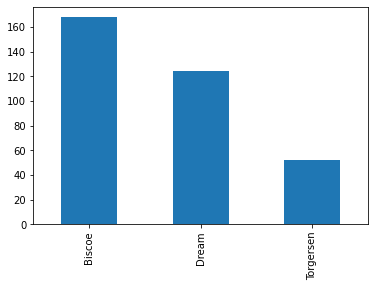

In [19]:
 # listando em gráfico de barras
dados['island'].value_counts().plot(kind='bar')

<AxesSubplot:>

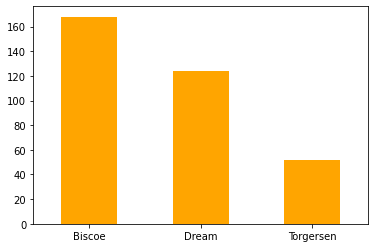

In [21]:
 # listando em gráfico de barras
dados['island'].value_counts().plot(kind='bar', rot=0,color ='orange')

In [23]:
# agrupando os dados por ilha e sexo
dados.groupby(['island', 'sex'])['species'].count()

island     sex   
Biscoe     Female    80
           Male      83
Dream      Female    61
           Male      62
Torgersen  Female    24
           Male      23
Name: species, dtype: int64

<AxesSubplot:xlabel='island,sex'>

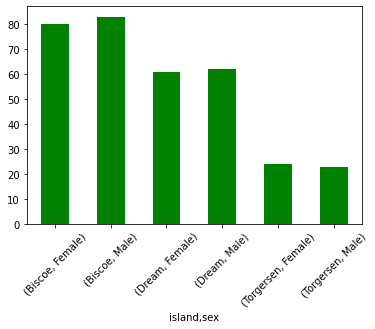

In [25]:
 # listando agrupammento em gráfico de barras
dados.groupby(['island', 'sex'])['species'].count().plot(kind='bar', rot=45,color ='green')

In [26]:
dados_count_isl_sex = dados.groupby(['island', 'sex'])['species'].count()

<AxesSubplot:xlabel='island,sex'>

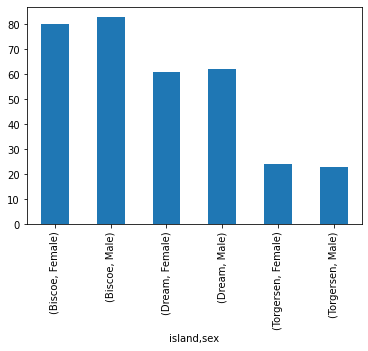

In [28]:
dados_count_isl_sex.plot(kind='bar')

In [30]:
# ajustando a coluna de sexo para transformar as linhas em colunas
dados_dummy = pd.get_dummies(dados, columns=['sex'])

In [32]:
dados_dummy.groupby('island').sum()[['sex_Female', 'sex_Male']]

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [34]:
dados_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum()

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


<AxesSubplot:xlabel='island'>

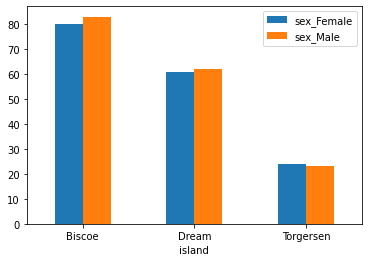

In [36]:
# listando agrupammento em gráfico de barras

dados_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.bar(rot=0)

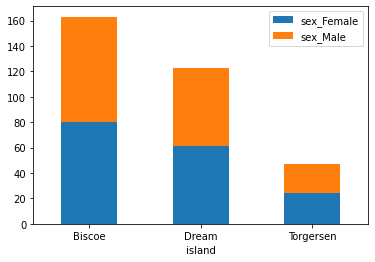

In [39]:
 # listando agrupammento em gráfico de barras empilhadas
dados_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.bar(rot=0, stacked=True);

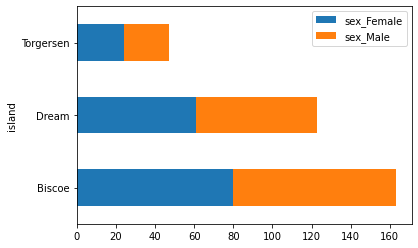

In [41]:
dados_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.barh(stacked=True);

In [42]:
dados_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().reset_index()

,island,sex_Female,sex_Male
0,Biscoe,80,83
1,Dream,61,62
2,Torgersen,24,23


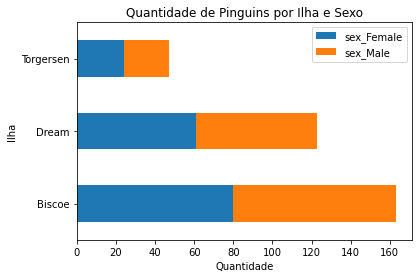

In [43]:
# Ajustando labels e legendas
g1 = dados_dummy.groupby('island')[['sex_Female', 'sex_Male']] \
  .sum() \
  .plot \
  .barh(rot=0, stacked=True)

g1.set_title('Quantidade de Pinguins por Ilha e Sexo')
g1.set_xlabel('Quantidade')
g1.set_ylabel('Ilha');